### **HR Analysis-Performence Based Analysis to Promote the Employees** 
* HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game.

![image](https://tse1.mm.bing.net/th?id=OIP.6lsPmKeNis6gi4y8l0sNigHaDM&pid=Api&P=0&w=445&h=193)

### Problem Statment :
Your client is a large MNC and they have 9 broad verticals across the organisation. **One of the problem your client is facing is around identifying the right people for promotion** (only for manager position and below) and prepare them in time. Currently the process, they are following is:

- 1. They first identify a set of employees based on recommendations/ past performance
- 2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
- 3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles.

***Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.***


- Variable:	Definition
- employee_id:	Unique ID for employee
- department:	Department of employee
- region:	Region of employment (unordered)
- education:	Education Level
- gender:	Gender of Employee
- recruitment_channel:	Channel of recruitment for employee
- no_of_trainings:	no of other trainings completed in previous year on soft skills, technical skills etc.
- age:	Age of Employee
- previous_year_rating:	Employee Rating for the previous year
- length_of_service:	Length of service in years
- KPIs_met : 80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
- awards_won:	if awards won during previous year then 1 else 0
- avg_training_score:	Average score in current training evaluations
- is_promoted	(Target): Recommended for promotion
 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('HR_train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Understanding the data 

In [3]:
df.shape

(54808, 14)

In [4]:
df.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Text(0.5, 1.0, 'Imbalance')

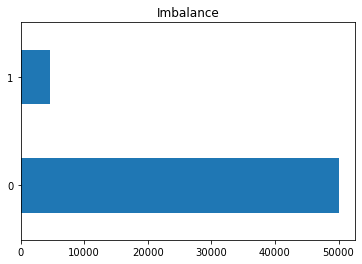

In [6]:
balance=df.is_promoted.value_counts()
balance.plot(kind='barh')
plt.title('Imbalance')

#### **Huge imbalence in the dataset only 4668 people are promoted out 54808 employees** 

- we see that there are null values in education and previous_year_rating 
- From the clint point of view they decide promotions based on the metrics from but no on gender and region or other factors so lets remove them 


## **Dealing the null values**

* Now this has become very importent we intially did imputing the null values by mode and mean methods which seems to be not worked properly as we can see the our f1 scores dropped and recall scores also dropped , Im trying to implement forwardfill and backwardfill for this time and trying to improvise the scores 


In [7]:
df.isnull().sum()/df.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

##### **But before going forward lets see why this values in previous_year_rating is null** is could be  :
* Employee might not have the previous year at all , which means that it can be 1st year of his/her job i.e., they could be fresher .so lets compare this and see if all these are freshers are not 
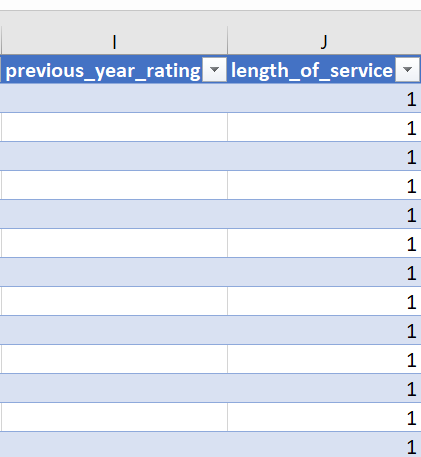

* So looking at the excel sheet by filtering all the blank columns in previous_year_data, it seems  that , they are all freshers . so previous yesar rating would be Zero . Technically there could be no data of all these emloyees in the data base .

In [8]:
df['previous_year_rating']=df['previous_year_rating'].fillna(0)

#### **Moving on to NULL values in  Education column**

In [9]:
df.education.isnull().sum()

2409

* Its hard  to find the Educational background , again we can go the each employee and collect the data for the accurate analysis, but that consumes huge amount of time and practically it is impossible for 2409 individuals  because you may not find all of them in office even if you would give a call there is no gaurantee that we can collect the data in short time . 
* so we have choosed an approch of forwardfill and backwardfill , assuming the data collected is taken from same educational backgrounds for the all emoloyees in the sequential manner .
* we have also tried mode but results are not promissing 

In [10]:
df['education']=df['education'].ffill(axis=0)
df['education']=df['education'].bfill(axis=0)


In [11]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Exploratory Data Analysis

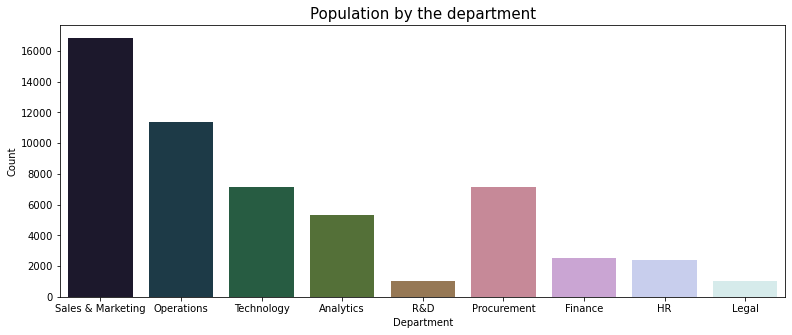

In [12]:
plt.figure(figsize=(13,5))
plt.style.use('seaborn-colorblind')
sns.countplot('department',data=df,palette='cubehelix')
plt.title('Population by the department',fontsize=15)
plt.xlabel("Department",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

- Majority of the Employees are from sales and marketing Department

Text(0.5, 1.0, 'Background of the Employee')

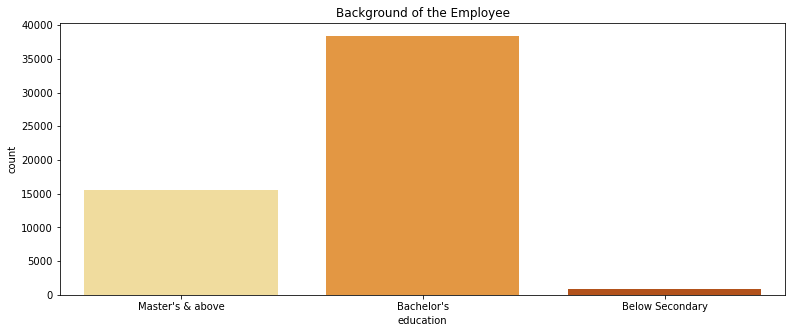

In [13]:
plt.figure(figsize=(13,5))
sns.countplot('education',data=df,palette='YlOrBr')
plt.title("Background of the Employee")
# Employees with Bacelors Education higher number 

Text(0.5, 1.0, 'Analysis by Region')

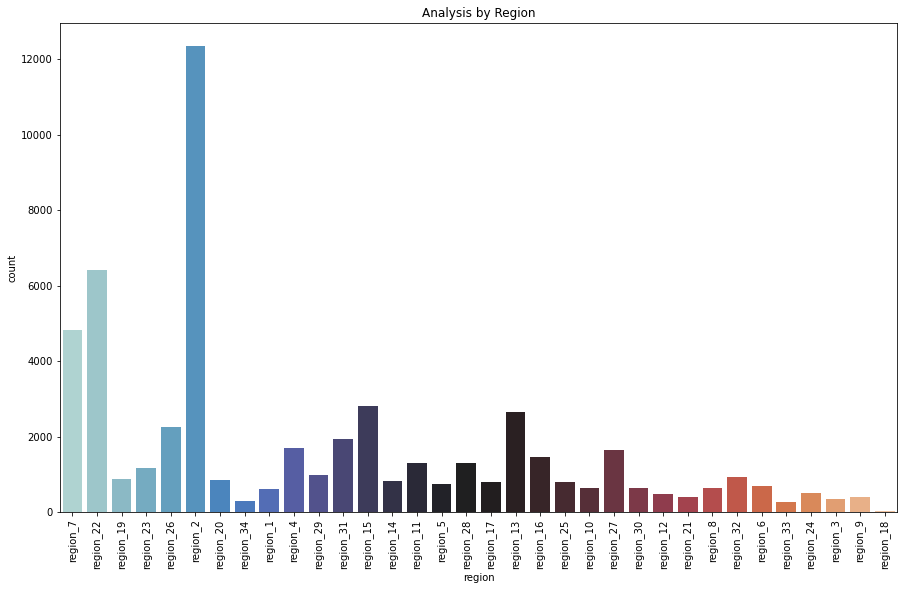

In [14]:
plt.figure(figsize=(15,9))
sns.countplot('region',data=df,palette='icefire')
plt.xticks(rotation=90)
plt.title("Analysis by Region")

Text(0.5, 1.0, 'Percentage of prmoted and Non-promoted people')

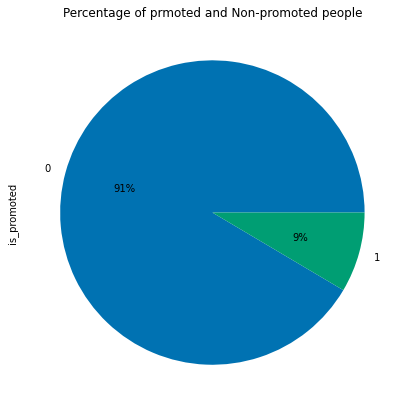

In [15]:
prmoted=df['is_promoted'].value_counts(normalize=True)#.reset_index()
prmoted.plot(kind="pie",autopct="%1.0f%%",figsize=(7,7))
plt.title('Percentage of prmoted and Non-promoted people')

# only 9% of the total people are promoted 

Text(0.5, 1.0, 'Promotions per department')

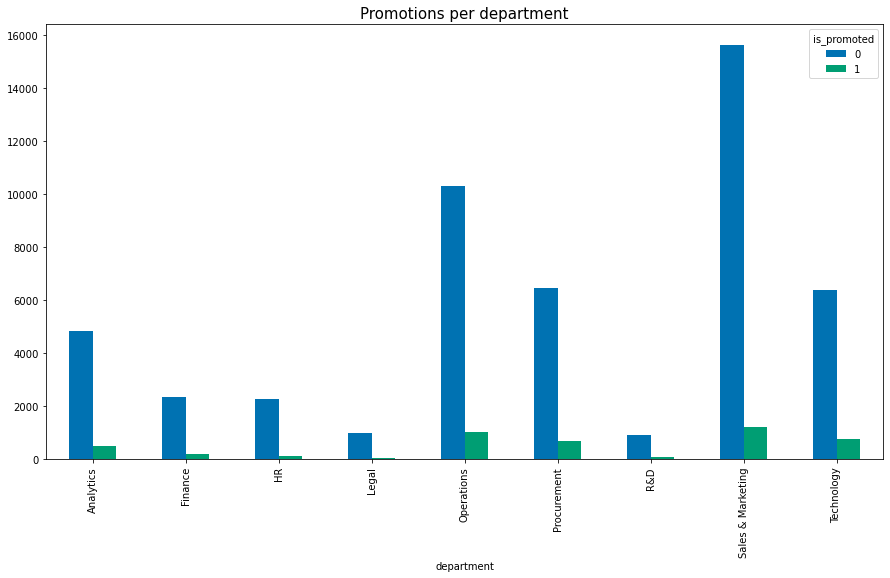

In [16]:
table1=pd.crosstab(df["department"],df["is_promoted"])
table1.plot(kind='bar',figsize=(15,8))
plt.title("Promotions per department",fontsize=15)



Text(0.5, 1.0, 'Gender Balance')

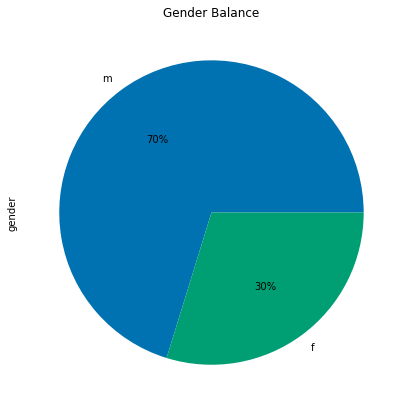

In [17]:
sex=df.gender.value_counts(normalize=True)
sex.plot(kind='pie',figsize=(7,7),autopct="%1.0f%%")
plt.title('Gender Balance')

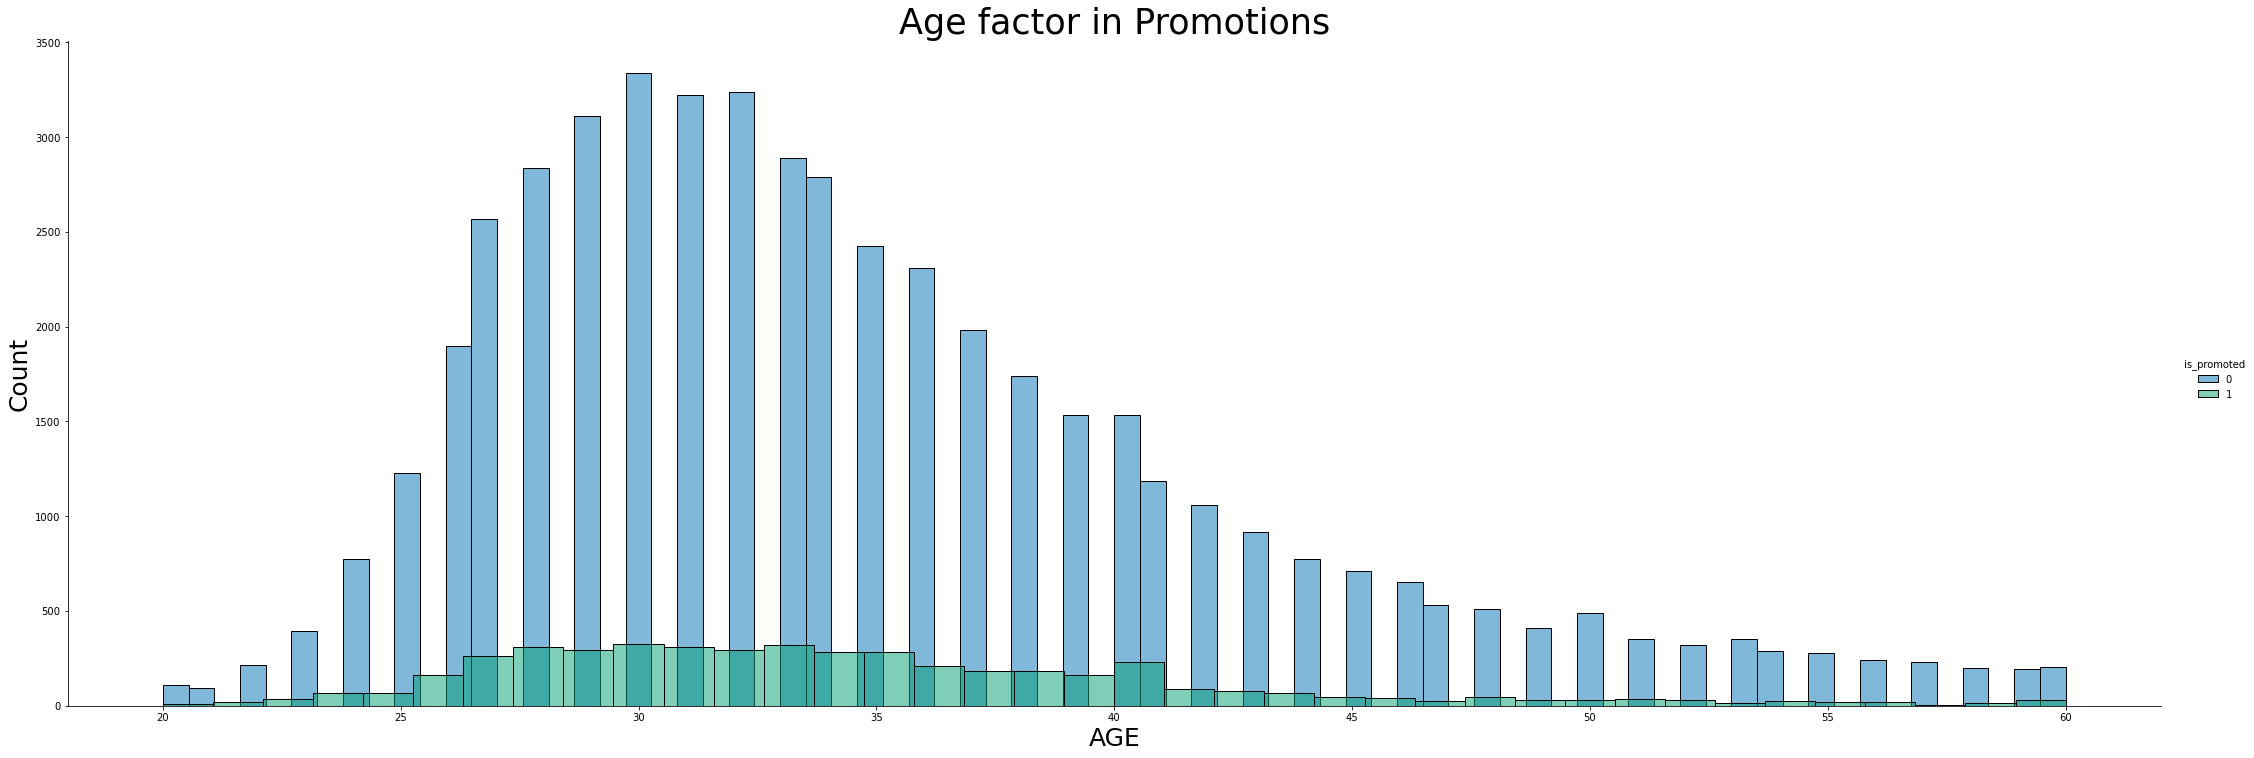

In [18]:
# lets explore the data by age variable 

fig=sns.FacetGrid(data=df,hue="is_promoted",aspect=3,height=10)
fig.map(sns.histplot,"age",alpha=0.5)
fig.add_legend()
plt.title("Age factor in Promotions",fontsize=35)
plt.xlabel("AGE",fontsize=25)
plt.ylabel("Count",fontsize=25)
plt.show()

- We observe that Employee who are promoted more are between 25 and 45

In [19]:
table2=df.groupby(by=["is_promoted","department"])['length_of_service'].mean()
table3=pd.DataFrame(table2)
table3

length_of_service
is_promoted department                          
0           Analytics                   4.952479
            Finance                     4.879828
            HR                          5.692375
            Legal                       4.625761
            Operations                  6.397676
            Procurement                 6.334574
            R&D                         4.610753
            Sales & Marketing           5.931081
            Technology                  5.967818
1           Analytics                   4.746094
            Finance                     4.135922
            HR                          5.536765
            Legal                       4.113208
            Operations                  6.601173
            Procurement                 6.297965
            R&D                         3.797101
            Sales & Marketing           5.670239
            Technology                  5.475260

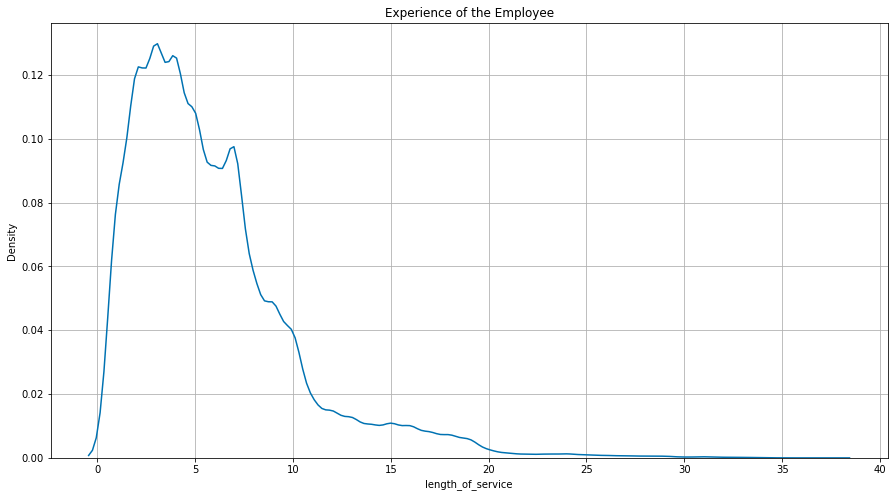

In [20]:
# lets explore the lenght of the service of the employee
plt.figure(figsize=(15,8))
sns.kdeplot(df.length_of_service)
plt.grid()
plt.title("Experience of the Employee")
plt.show()

- Most of the employees are having experience between 0 and 10 

<Figure size 1080x576 with 0 Axes>

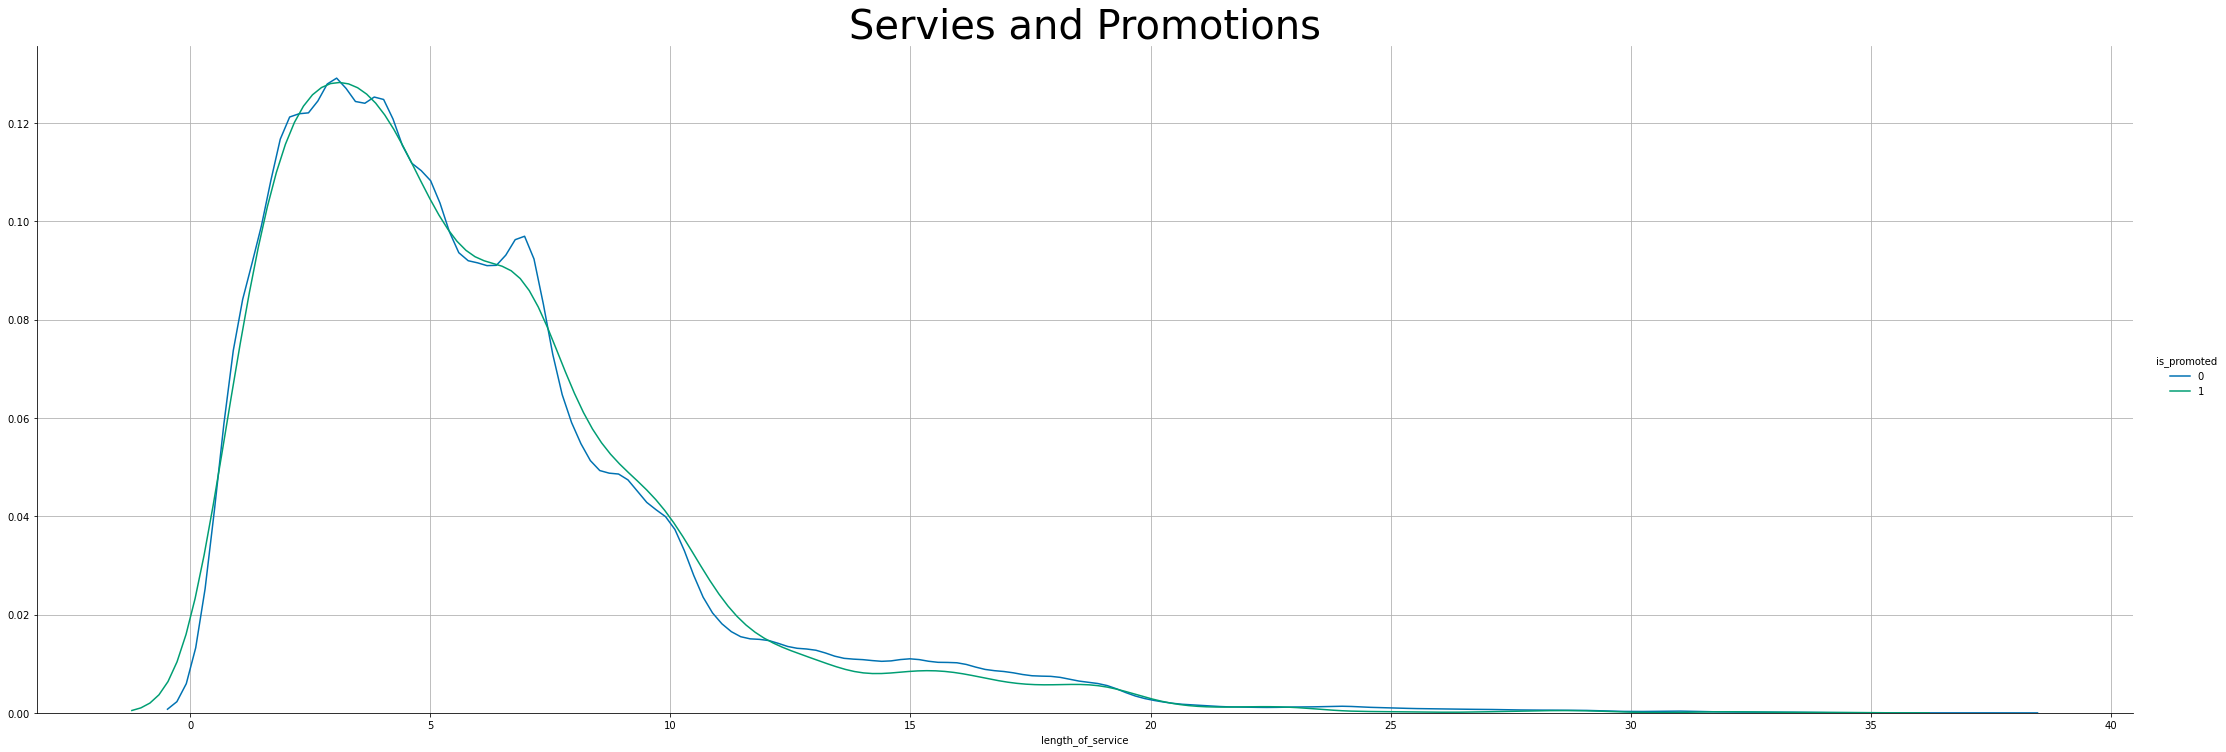

In [21]:
plt.figure(figsize=(15,8))
fig=sns.FacetGrid(data=df,hue="is_promoted",aspect=3,height=10)
fig.map(sns.kdeplot,"length_of_service",shade=False)
fig.add_legend()
plt.title("Servies and Promotions",fontsize=40)
plt.grid()
plt.show()

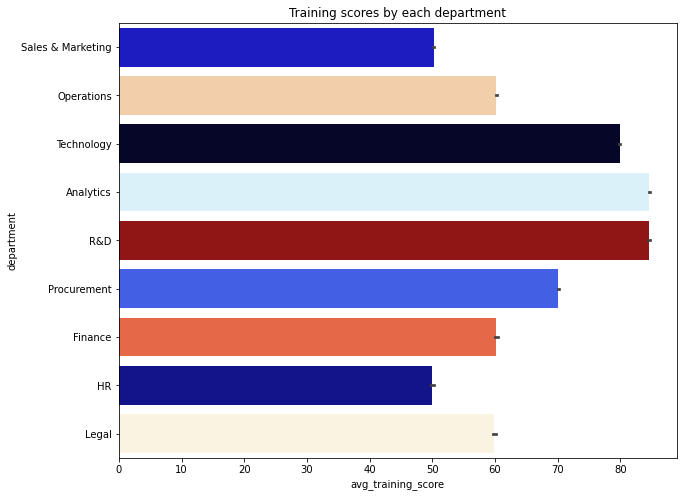

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(y='department',x='avg_training_score',data=df,palette='flag')
plt.title("Training scores by each department")
plt.show()

In [23]:
train_score_prmoted=df.groupby('is_promoted')['avg_training_score'].mean()
table4=pd.DataFrame(train_score_prmoted)
table4

,avg_training_score
is_promoted,
0,62.647686
1,71.325193


In [24]:
exp_prmoted=df.groupby('is_promoted')['length_of_service'].mean()
table5=pd.DataFrame(exp_prmoted)
table5

,length_of_service
is_promoted,
0,5.879398
1,5.716367


<AxesSubplot:xlabel='length_of_service', ylabel='avg_training_score'>

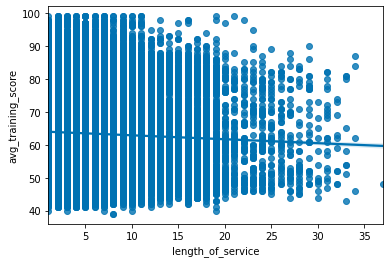

In [25]:
sns.regplot(x="length_of_service", y="avg_training_score", data=df)

<AxesSubplot:xlabel='previous_year_rating', ylabel='avg_training_score'>

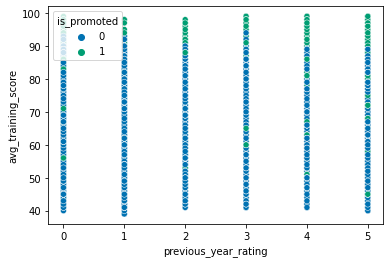

In [26]:
sns.scatterplot(x="previous_year_rating", y="avg_training_score", data=df,hue='is_promoted')

In [27]:
df['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [28]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

- we observe that even though 19291 people scores more than 80% of KPI only 4688 people were promoted 

In [29]:
x=19291-4868
print("People who are not promoted even after getting 80 and above KPI score:",x)


People who are not promoted even after getting 80 and above KPI score: 14423


In [30]:
correlation=df['KPIs_met >80%'].corr(df["is_promoted"])
correlation

0.22158153967700805

Text(0.5, 1.0, 'Recrutied Via')

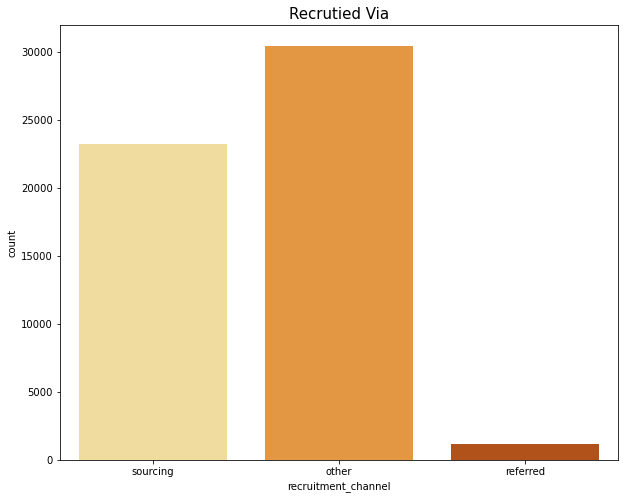

In [31]:
plt.figure(figsize=(10,8))
sns.countplot('recruitment_channel',data=df,palette='YlOrBr')
plt.title('Recrutied Via',fontsize=15)

<AxesSubplot:>

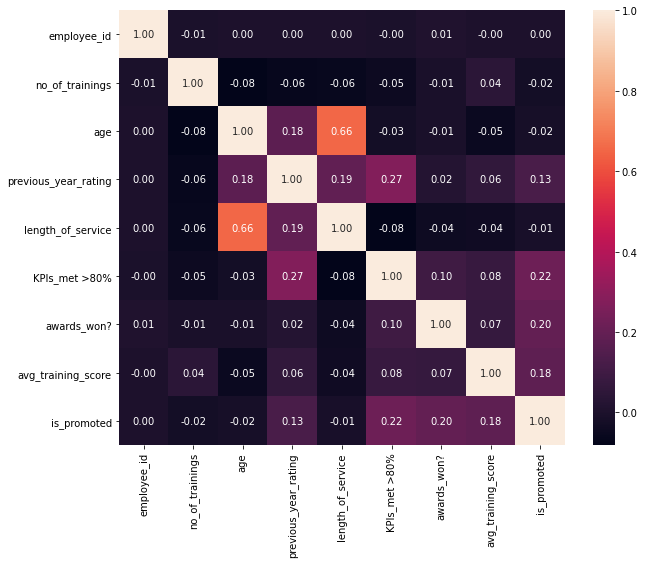

In [32]:
total_correlation=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(total_correlation,annot=True,fmt='.2f')

<AxesSubplot:xlabel='previous_year_rating', ylabel='KPIs_met >80%'>

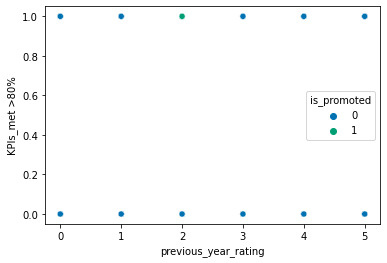

In [33]:
sns.scatterplot(x="previous_year_rating", y='KPIs_met >80%', data=df,hue='is_promoted')

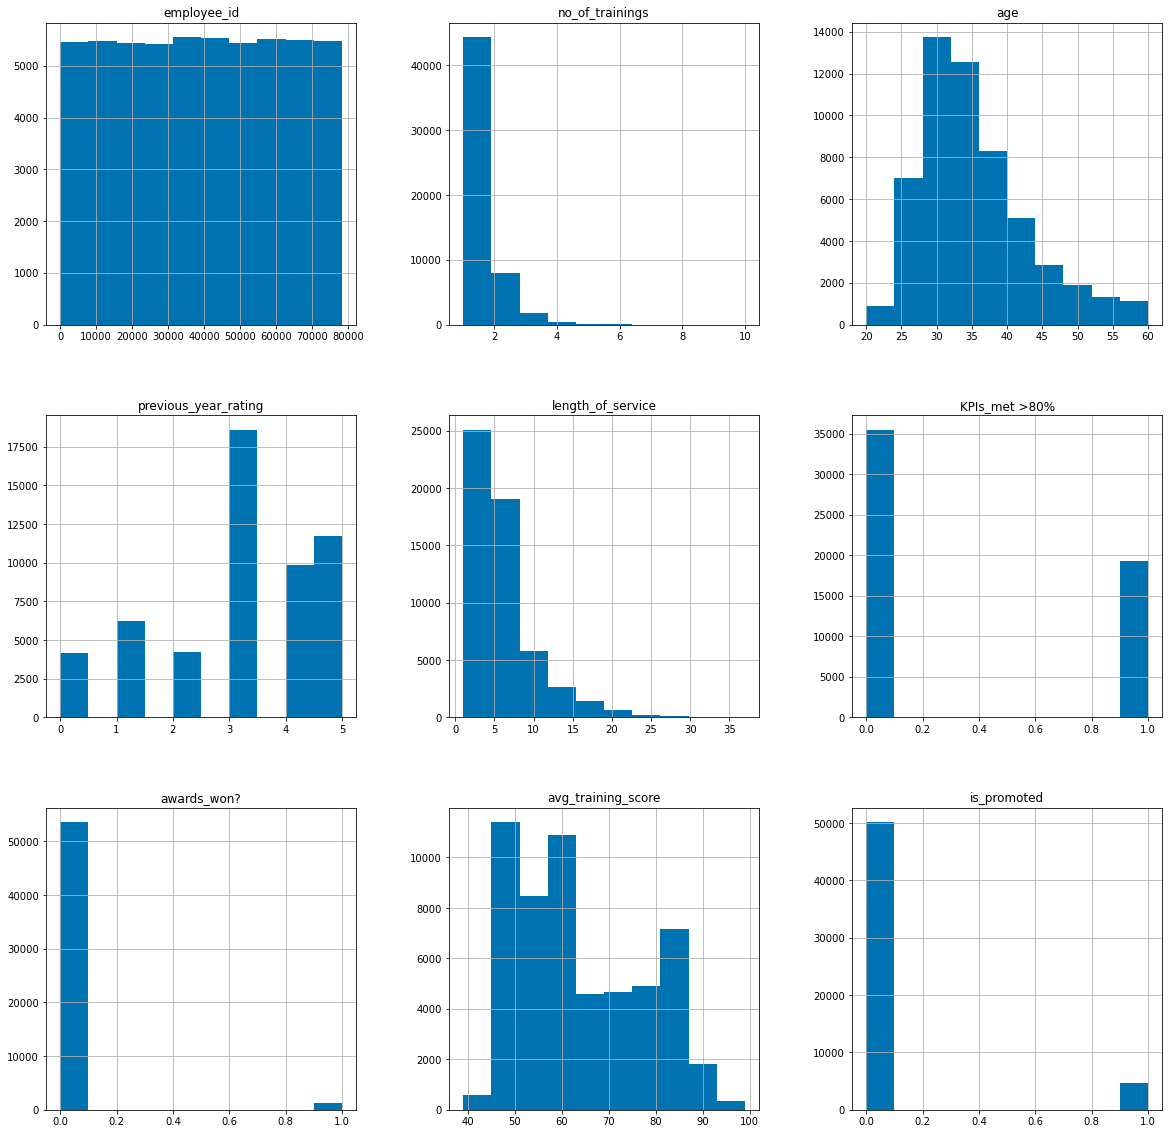

In [34]:
df.hist(figsize=(20,20))
plt.show()

In [35]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='length_of_service'>

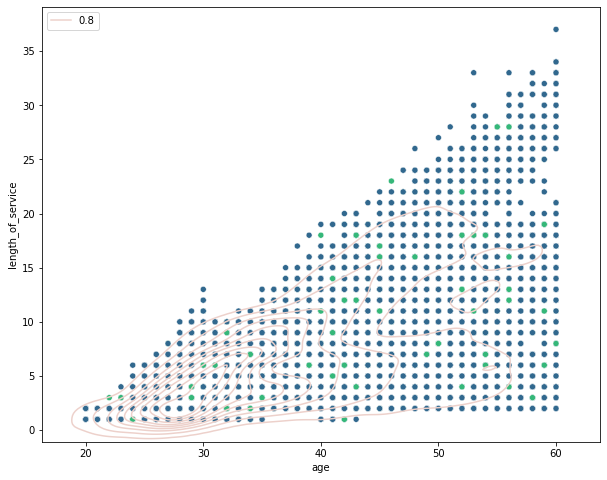

In [36]:
# How is the age and los id related 
plt.figure(figsize=(10,8))
sns.scatterplot(df["age"],df['length_of_service'],hue=df['is_promoted'],palette="viridis")
sns.kdeplot(df["age"],df['length_of_service'],hue=0.8)

<Figure size 1080x576 with 0 Axes>

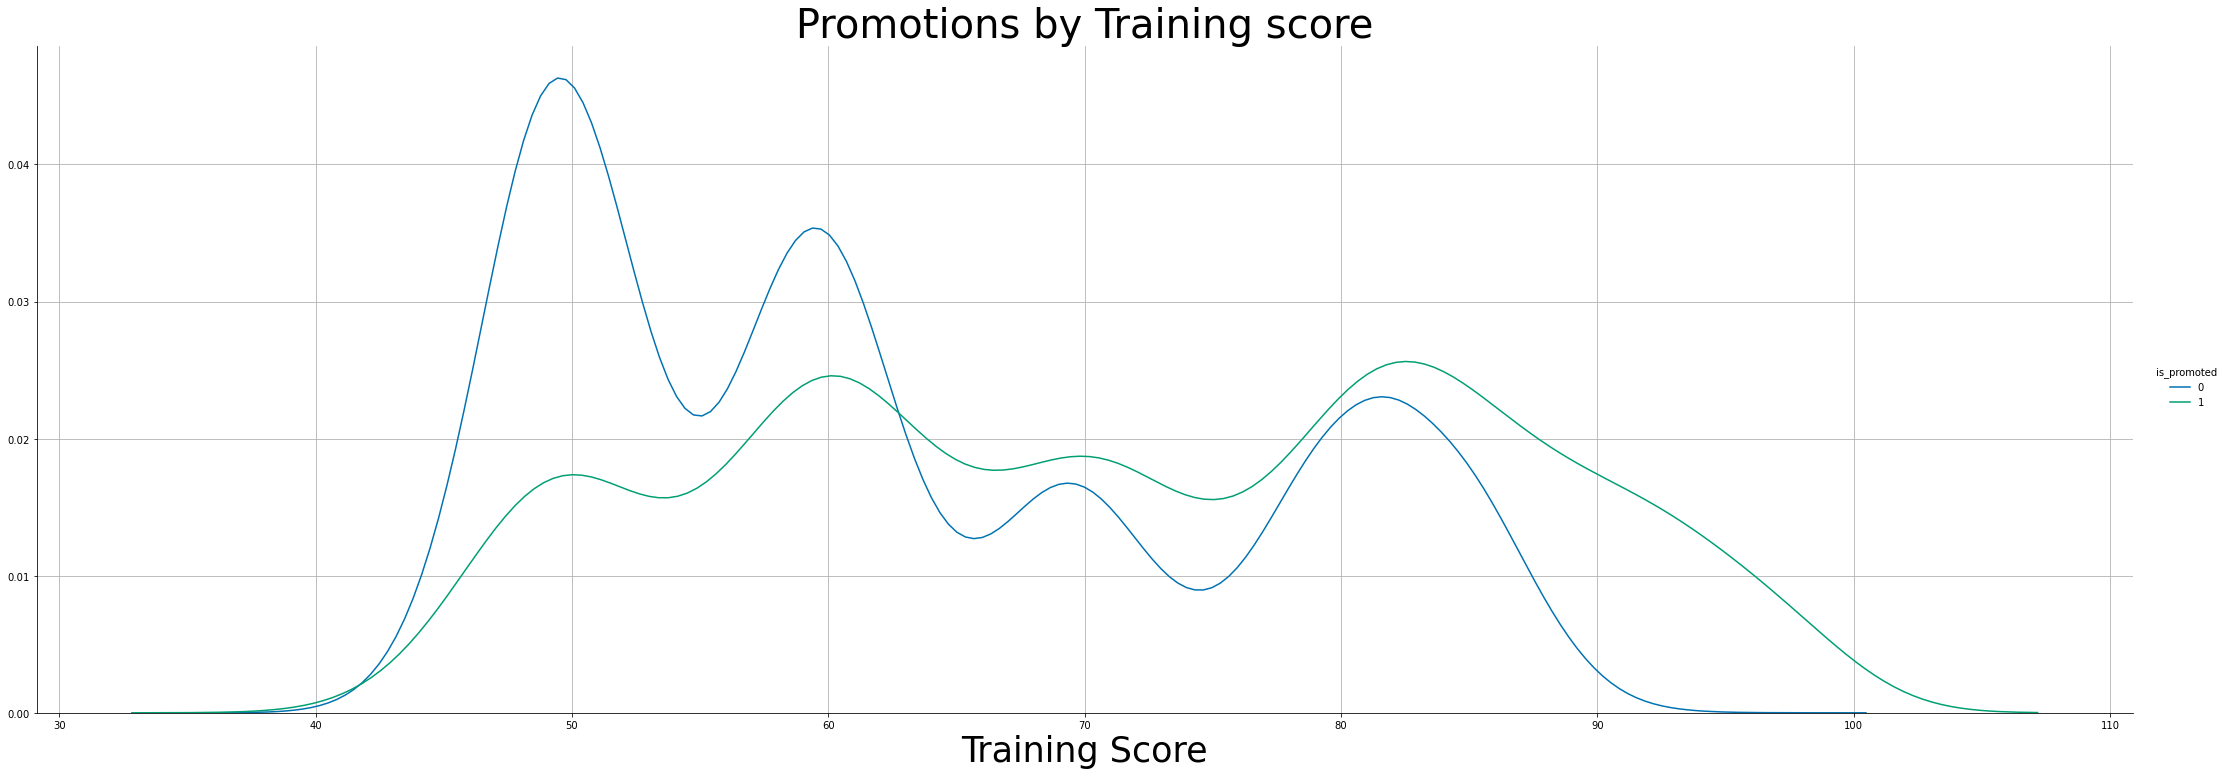

In [37]:
plt.figure(figsize=(15,8))
fig=sns.FacetGrid(data=df,hue="is_promoted",aspect=3,height=10)
fig.map(sns.kdeplot,"avg_training_score",shade=False)
fig.add_legend()
plt.title("Promotions by Training score",fontsize=40)
plt.xlabel("Training Score",fontsize=35)
plt.grid()
plt.show()

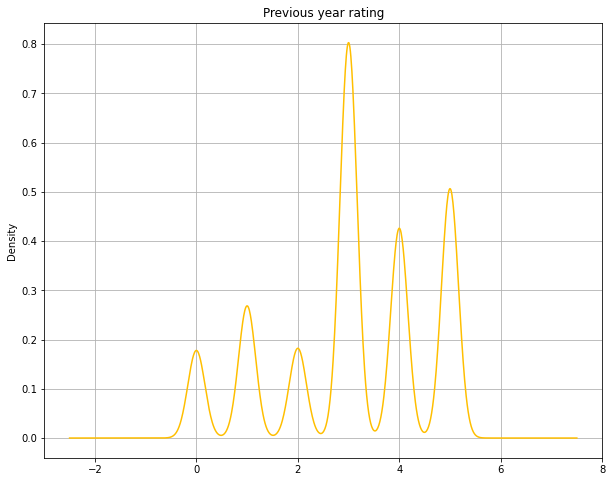

In [38]:
plt.figure(figsize=(10,8))
df.previous_year_rating.plot(kind="kde",color="#FFBF00")
plt.title('Previous year rating')
plt.grid()
plt.show()

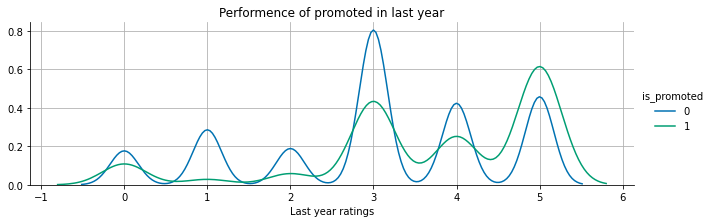

In [39]:

fig=sns.FacetGrid(data=df,hue="is_promoted",aspect=3)
ax= fig.map(sns.kdeplot,"previous_year_rating",shade=False)
fig.add_legend()
plt.title("Performence of promoted in last year")
plt.xlabel("Last year ratings")
plt.grid()
plt.show()

## Check Points :
- Employees those promoted are observed to be between 20 and 40 age group, as these are promoted to the Manager level and below , keeping the age scale is also important
- length of the service: 1-7 years (not much importent to inculde as it is negatively related to the promotions )
- Previous rating are observed be 5 for majority of the employees promoted .
- KPI Score to be kept high as the they related in figuring out the promoted candidature .
- Training score ,which is major factor people with the training score above 80 can considered.
- Awards won also could not be the factor , as we can see that people with no awards won also performed well in training .

### Observations:
- Employess who are promoted have higher last yeat rating as 5,better select the people with higher ratings as it is positively contributing.
-People who are $not promoted$ even after getting 80 and above KPI score are *14423*.
- Observing that length of the service and age are linearly related but the **number of promotions are high with the Employees having service of 1-7 years.**
- The average training score of promoted is 71.3
- Employees from sales marketing have higer promotions then rest 
- Winning an award and having good lastyear rating and training score and KPI score are the major factors when it comes to promoting and they are postively related .



# Feature Selection and Feature Engneerring 

In [40]:
df.shape

(54808, 14)

- lets drop the features that are not importent in indicating the prmotions such as gender, degree etc..


In [41]:
df.keys()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [42]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### **Lets check for the Outliers in all the features**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'no_of_trainings'),
  Text(1, 0, 'age'),
  Text(2, 0, 'previous_year_rating'),
  Text(3, 0, 'length_of_service'),
  Text(4, 0, 'KPIs_met >80%'),
  Text(5, 0, 'awards_won?'),
  Text(6, 0, 'avg_training_score'),
  Text(7, 0, 'is_promoted')])

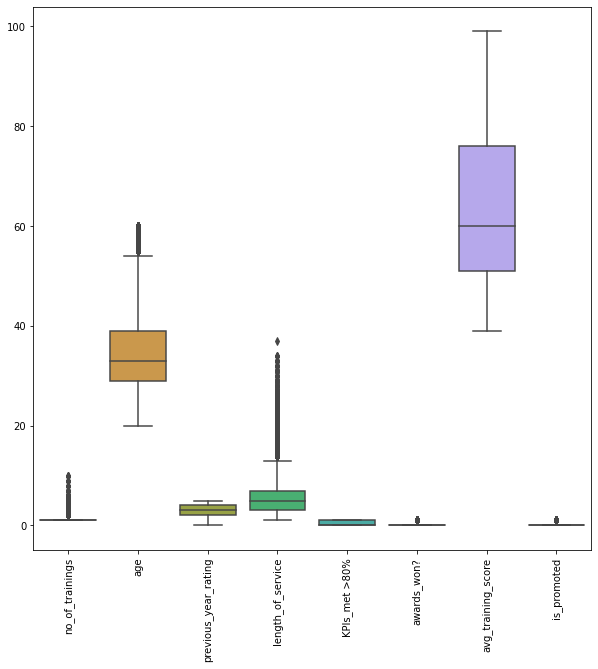

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.drop('employee_id',axis='columns'))
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Density'>

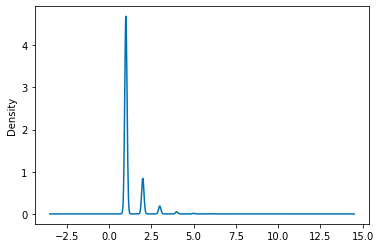

In [44]:
df.no_of_trainings.plot(kind="kde")

- Lets explore the data by lenght of service of the employees

<AxesSubplot:ylabel='Density'>

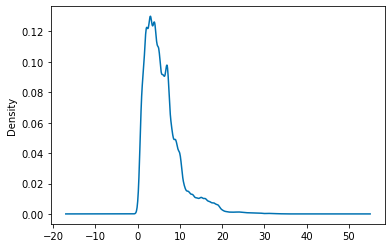

In [45]:
df.length_of_service.plot(kind="kde")

- observing that outliers in age and lenght of service are removed compared to previous 

In [46]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


##### **splitting into dependent and independent features**

In [47]:
x=df.drop('is_promoted',axis='columns')

In [48]:
y=df['is_promoted']

In [49]:
x.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


### **ONE-HOT ENCODING**

In [50]:
dummies=pd.get_dummies(x)

In [51]:
dummies

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,0,...,0,0,1,0,0,0,1,0,0,1
54804,74592,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,1,1,0,1,0,0
54805,13918,1,27,5.0,3,1,0,79,1,0,...,0,0,1,0,0,0,1,1,0,0
54806,13614,1,29,1.0,2,0,0,45,0,0,...,0,1,1,0,0,0,1,0,0,1


In [52]:
x_encoded=dummies.copy()
x_encoded.shape

(54808, 59)

In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

## **FEATURE ENGINEERNIG**
- we are using Robustscaler , because as we hae seen that we have outliers Robustscaler has teh capacity to deal with them 

In [54]:
from sklearn.preprocessing import RobustScaler




In [55]:
scaler=RobustScaler()

In [56]:
x_scaled=scaler.fit_transform(x_encoded)

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.25,random_state=22)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((41106, 59), (41106,), (13702, 59), (13702,))

# Model Building

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score, confusion_matrix, roc_curve, recall_score, precision_score, f1_score 
from sklearn import metrics

accuracy Score: 93.1615822507663
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     13333
           1       0.26      0.83      0.40       369

    accuracy                           0.93     13702
   macro avg       0.63      0.88      0.68     13702
weighted avg       0.98      0.93      0.95     13702



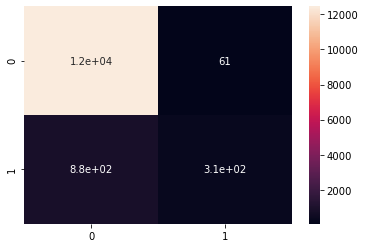

In [60]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)
cnf_matrix=metrics.confusion_matrix(ytest,y_pred)
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)

# printing the accuracy score 
print("accuracy Score:",accuracy_score(y_pred,ytest)*100)
# classification report 
print("Classification report:\n",classification_report (y_pred,ytest))


In [82]:
lr_model_vales=dict(accuracy=accuracy_score(y_pred,ytest)*100,
                   recall=recall_score(y_pred,ytest),
                   precision=precision_score(y_pred,ytest),
                   f1_score=metrics.f1_score(y_pred,ytest))

In [61]:
f1_score=f1_score(y_pred,ytest)
print('F1 score for linearmodel is :',f1_score)


F1 score for linearmodel is : 0.3966516419832582


accuracy Score: 92.76747920011678
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     12891
           1       0.42      0.62      0.50       811

    accuracy                           0.93     13702
   macro avg       0.70      0.78      0.73     13702
weighted avg       0.94      0.93      0.93     13702



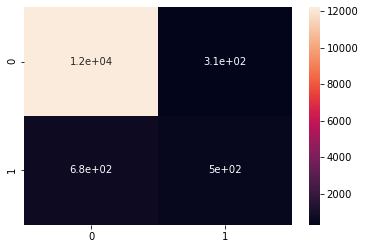

In [62]:
xg=XGBClassifier(learning_rate =0.1,
                                           n_estimators=494,
                                           max_depth=5,
                                           subsample = 0.70,
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2)
xg.fit(xtrain,ytrain)
xg_pred=xg.predict(xtest)
cnf_matrix=metrics.confusion_matrix(ytest,xg_pred)
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)

# printing the accuracy score 
print("accuracy Score:",accuracy_score(xg_pred,ytest)*100)
# classification report 
print("Classification report:\n",classification_report (xg_pred,ytest))


In [69]:
f1_score=metrics.f1_score(ytest,xg_pred)
print('F1 score for XGB is :',f1_score)

F1 score for XGB is : 0.5032581453634084


In [83]:
xg_model_vales=dict(accuracy=accuracy_score(xg_pred,ytest)*100,
                   recall=recall_score(xg_pred,ytest),
                   precision=precision_score(xg_pred,ytest),
                   f1_score=metrics.f1_score(xg_pred,ytest))

In [70]:
rf=RandomForestClassifier()


In [71]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [72]:
rf_pred=rf.predict(xtest)

In [73]:
cnf_matrix=metrics.confusion_matrix(ytest,rf_pred)

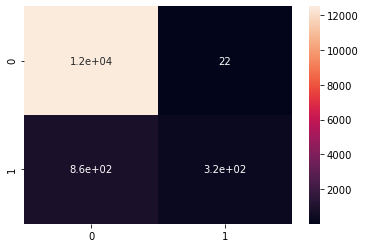

In [74]:
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)

In [76]:
print("accuracy Score:",accuracy_score(rf_pred,ytest)*100)
print("Classification report:\n",classification_report (rf_pred,ytest))

accuracy Score: 93.54108889213254
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     13359
           1       0.27      0.94      0.42       343

    accuracy                           0.94     13702
   macro avg       0.63      0.94      0.69     13702
weighted avg       0.98      0.94      0.95     13702



In [78]:
f1_score=metrics.f1_score(ytest,rf_pred)
print(f1_score)

0.42043222003929276


In [84]:
rf_model_vales=dict(accuracy=accuracy_score(rf_pred,ytest)*100,
                   recall=recall_score(rf_pred,ytest),
                   precision=precision_score(rf_pred,ytest),
                   f1_score=metrics.f1_score(rf_pred,ytest))

* F1 score is the evaluation metric for this Hackathon. It is the harmonic mean of Precision and Recall:
* F1 Score = 2* ( (precision*recall) / (precision+recall) )

* Precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly
* Recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive
* F1 score provides a better measure of the incorrectly classified ones, than Accuracy metric since F1 score penalizes the extreme values


xg_model_vales=dict(accuracy=accuracy_score(xg_pred,ytest)*100,ROC_AUC=roc_auc_score(xg_pred,ytest)*100,
                   recall=recall_score(xg_pred,ytest),
                   precision=precision_score(xg_pred,ytest),
                   f1_score=f1_score(xg_pred,ytest))

# Model Performence

In [85]:
model_performence=pd.DataFrame(data=[xg_model_vales,lr_model_vales,rf_model_vales]
                              ,index=["XGB","Logistice regression",'Randomforest'])

In [86]:
model_performence

,accuracy,recall,precision,f1_score
XGB,92.767479,0.618989,0.423986,0.503258
Logistice regression,93.161582,0.834688,0.260135,0.396652
Randomforest,93.541089,0.935860,0.271115,0.420432


#### **HYPERPARAMETER TUNING FOR XGBOOST**

In [111]:
params={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25],
    'max_depth':[3,5,8,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.4,0.5],
    'colsample_bytree':[0.3,0.5,0.7,0.9]
}

In [112]:
xg_hyp=XGBClassifier()

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
random_search=RandomizedSearchCV(xg_hyp,param_distributions=params,n_iter=5,scoring='roc_auc',
                                n_jobs=-1,cv=5,verbose=3)

In [115]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   38.0s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   43.4s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [116]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.5,
 'colsample_bytree': 0.9}

In [125]:
xgb_classifier=XGBClassifier(min_child_weight=1,max_depth= 3,
 learning_rate= 0.15,
 gamm= 0.5,
 colsample_bytree= 0.9)

#### **MODEL AFTER TUNING**

In [126]:
xgb_classifier.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamm=0.5, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
xgb_ypred=xgb_classifier.predict(xtest)

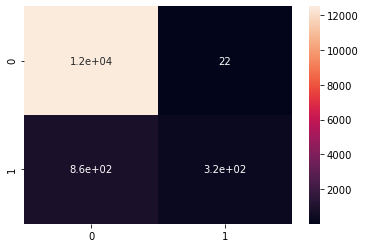

In [128]:
nf_matrix=metrics.confusion_matrix(ytest,xgb_ypred)
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)

In [129]:
print("accuracy Score:",accuracy_score(xgb_ypred,ytest)*100)
print("Classification report:\n",classification_report (xgb_ypred,ytest))

accuracy Score: 94.01547219384031
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     13320
           1       0.32      0.98      0.48       382

    accuracy                           0.94     13702
   macro avg       0.66      0.96      0.72     13702
weighted avg       0.98      0.94      0.95     13702



In [131]:
F1_aftertuning=metrics.f1_score(xgb_ypred,ytest)
print('F1score after permorming hyperparameter tuning: {}'.format(F1_aftertuning))

F1score after permorming hyperparameter tuning: 0.4763729246487867


* seems like we have good F1 score before this 

# Evaluating values for the test data 


In [87]:
dt=pd.read_csv("HR_test.csv")
dt.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [88]:
dt.keys()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [89]:
dt.shape

(23490, 13)

In [90]:
dt.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

- Replacing the null values

In [91]:
dt.education.value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [92]:
dt['education']=dt['education'].ffill(axis=0)
dt['education']=dt['education'].bfill(axis=0)

In [93]:
dt['previous_year_rating']=dt['previous_year_rating'].fillna(0)

In [94]:
dt.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [95]:
dt1=pd.get_dummies(dt)

In [96]:
dt1

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,24,0.0,1,1,0,77,0,0,...,0,0,1,0,0,0,1,0,0,1
1,74430,1,31,3.0,5,0,0,51,0,0,...,0,0,1,0,0,1,0,1,0,0
2,72255,1,31,1.0,4,0,0,47,0,0,...,0,0,1,0,0,0,1,1,0,0
3,38562,3,31,2.0,9,0,0,65,0,0,...,0,0,1,0,0,1,0,1,0,0
4,64486,1,30,4.0,7,0,0,61,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,1,24,3.0,1,0,0,61,0,0,...,0,0,0,1,0,0,1,0,0,1
23486,25600,1,31,3.0,7,0,0,74,0,0,...,0,0,1,0,0,0,1,0,0,1
23487,45409,1,26,4.0,4,0,0,50,0,0,...,0,0,1,0,0,1,0,0,0,1
23488,1186,3,27,0.0,1,0,0,70,0,0,...,0,0,1,0,0,0,1,0,0,1


In [98]:
submission = pd.read_csv('sample_submission_HR.csv')
finalprediction=lr.predict(dt1)

In [99]:
submission['is_promoted'] = finalprediction
submission['is_promoted'] = submission['is_promoted'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('MY_HR_submission_revised.csv', index=False)